In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin   # 对两个序列中的点进行距离匹配
from sklearn.datasets import load_sample_image

from sklearn.utils import shuffle


In [2]:
china = load_sample_image('china.jpg')

In [5]:
china.dtype

dtype('uint8')

In [7]:

newimage = china.reshape((427 * 640,3))

In [10]:
newimage.shape

(273280, 3)

In [12]:
pd.DataFrame(newimage).drop_duplicates().shape

(96615, 3)

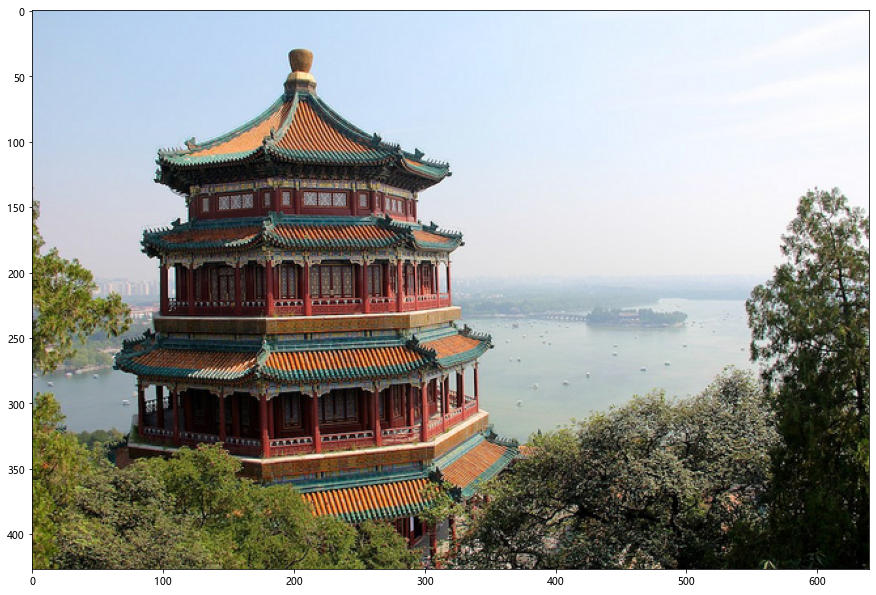

In [14]:
import pandas as pd
plt.figure(figsize=(15,15))
plt.imshow(china)


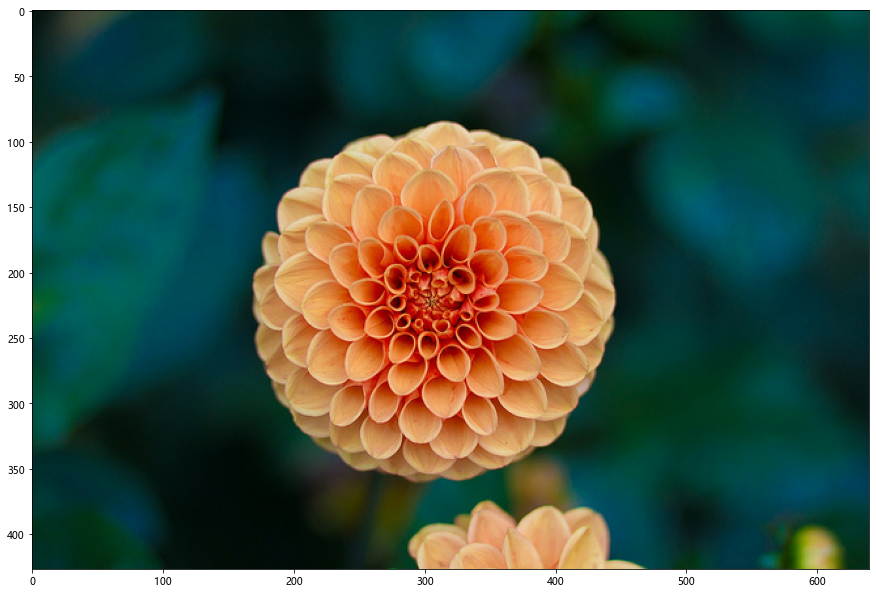

In [15]:
flower = load_sample_image("flower.jpg")
plt.figure(figsize=(15,15))
plt.imshow(flower)

In [36]:
n_clusters = 64

In [37]:
china = np.array(china, dtype=np.float64) / china.max()

In [38]:
w, h, d = original_shape = tuple(china.shape)

In [39]:
assert d == 3
# d_ = 5
# assert d_ == 3, "一个格子中的特征数目不等于3种"

In [40]:
image_array = np.reshape(china, (w * h, d))
image_array.shape

(273280, 3)

In [41]:
# 使用1000个数据找出质心
image_array_sample = shuffle(image_array,random_state=100)[:1000]
kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(image_array_sample)
kmeans.cluster_centers_

array([[0.97135261, 0.97627119, 0.99441675],
       [0.20261438, 0.25098039, 0.25708061],
       [0.60653595, 0.59542484, 0.57581699],
       [0.814082  , 0.82299465, 0.842959  ],
       [0.39772962, 0.35830753, 0.32610939],
       [0.11633987, 0.04084967, 0.03562092],
       [0.28612368, 0.22564103, 0.18250377],
       [0.15856209, 0.15633987, 0.12143791],
       [0.81984551, 0.89839572, 0.98336304],
       [0.75947712, 0.42875817, 0.31111111],
       [0.71137255, 0.75639216, 0.75654902],
       [0.50392157, 0.51078431, 0.36764706],
       [0.50392157, 0.25490196, 0.17647059],
       [0.84836601, 0.50392157, 0.41568627],
       [0.45490196, 0.44862745, 0.20980392],
       [0.19327731, 0.31820728, 0.34397759],
       [0.76142024, 0.85119237, 0.95060943],
       [0.93575548, 0.94002307, 0.95582468],
       [0.92026144, 0.66143791, 0.44052288],
       [0.66498599, 0.66106443, 0.61344538],
       [0.42679739, 0.49215686, 0.49019608],
       [0.8745098 , 0.93229292, 0.9919968 ],
       [0.

In [43]:
# 找出质心后，按照已存在的质心进行分类
from cProfile import label

labels = kmeans.predict(image_array)
labels      # 簇的质心的索引

array([27, 27, 27, ..., 24, 46, 30])

In [44]:
image_kmeans = image_array.copy()

In [45]:
for i in range(w*h):
    image_kmeans[i] = kmeans.cluster_centers_[labels[i]]

In [46]:
image_kmeans.shape

(273280, 3)

In [47]:
pd.DataFrame(image_kmeans).drop_duplicates().shape

(64, 3)

In [49]:
image_kmeans = image_kmeans.reshape(w,h,d)
image_kmeans.shape

(427, 640, 3)

In [50]:
centroid_random = shuffle(image_array, random_state=0)[:n_clusters]
labels_random = pairwise_distances_argmin(centroid_random,image_array,axis=0)
labels_random.shape
len(set(labels_random))
image_random = image_array.copy()
for i in range(w*h):
    image_random[i] = centroid_random[labels_random[i]]
image_random = image_random.reshape(w,h,d)
image_random.shape

(427, 640, 3)

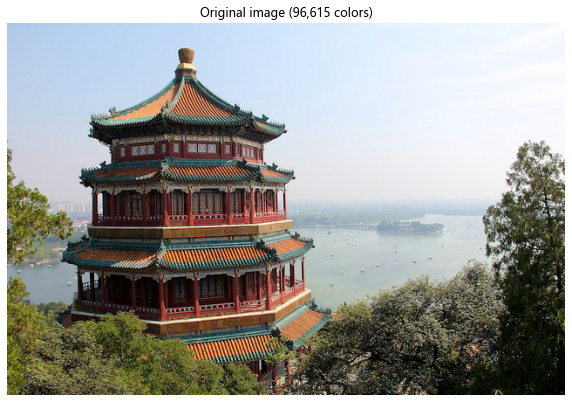

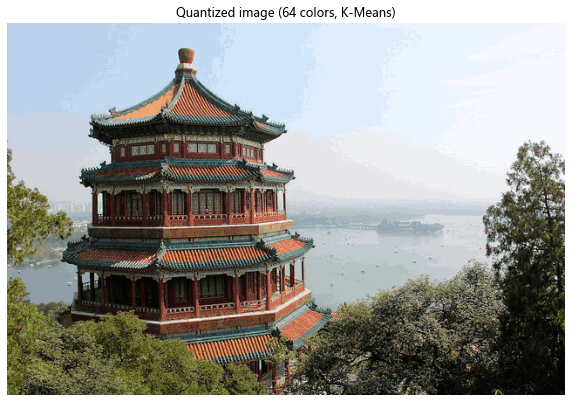

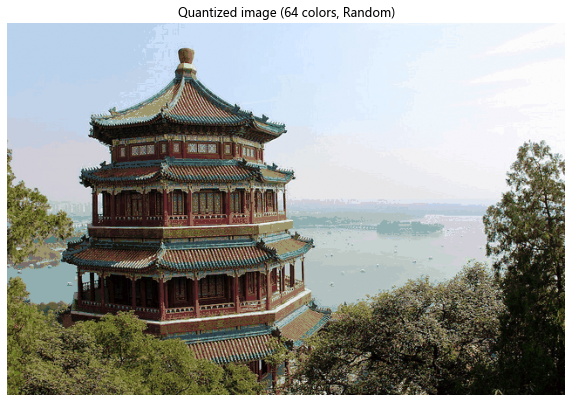

In [51]:
plt.figure(figsize=(10,10))
plt.axis('off')
plt.title('Original image (96,615 colors)')
plt.imshow(china)
plt.figure(figsize=(10,10))
plt.axis('off')
plt.title('Quantized image (64 colors, K-Means)')
plt.imshow(image_kmeans)
plt.figure(figsize=(10,10))
plt.axis('off')
plt.title('Quantized image (64 colors, Random)')
plt.imshow(image_random)
plt.show()

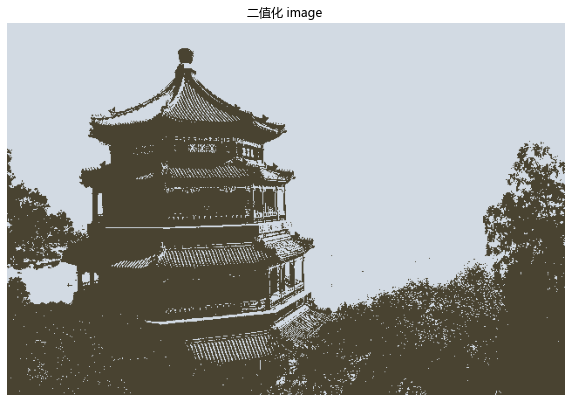

In [61]:
#  降维处理图像
n_clusters = 2
image_array_sample = shuffle(image_array,random_state=100)[:1000]
kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(image_array_sample)
kmeans.cluster_centers_
labels = kmeans.predict(image_array)
image_kmeans = image_array.copy()
for i in range(w*h):
    image_kmeans[i] = kmeans.cluster_centers_[labels[i]]
image_kmeans = image_kmeans.reshape(w,h,d)
plt.figure(figsize=(10,10))
plt.axis('off')
plt.title('二值化 image ')
plt.imshow(image_kmeans)